In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# basic import 
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a dataset

In [3]:
from build_poly import build_poly
from standard import standardize 

# number of samples in the dataset
num_data = 100

# features
x = np.linspace(0.1, 2 * np.pi, num_data)

# observations
offset = 1
noiseLevel = 0.1
y = np.sin(x) + offset + noiseLevel * np.random.randn(num_data).T

# standardize 
x_std, mean_x, std_x = standardize(x)

# polynomial basis function
degree = 3
tx = build_poly(x_std[:, None], degree)

print(x_std.shape)
print(tx.shape)
print(y.shape)

(100,)
(100, 4)
(100,)


# Test Least Square 

tr_LOSS: 0.00728399396548
te_LOSS: 0.514042042224


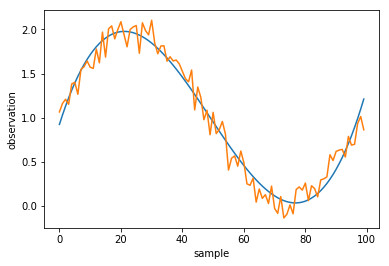

In [4]:
from implementations import least_squares

wls, loss = least_squares(y, tx)

print("tr_LOSS:" , loss)
print("te_LOSS:" , np.mean((np.sin(x)-tx.dot(wls))**2)/2)

# plot results
plt.figure()
plt.plot(tx.dot(wls))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test Ridge Regression

tr_LOSS: 26.3515446
te_LOSS: 0.350731774064


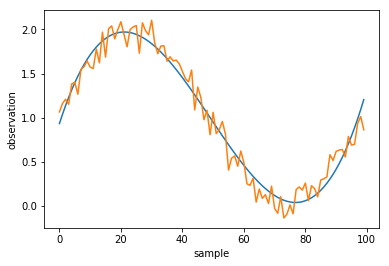

In [5]:
from implementations import ridge_regression

lambda_ = 100
wrr, loss = ridge_regression(y, tx, lambda_)

print("tr_LOSS:" , loss)
print("te_LOSS:" , np.mean((tx.dot(wrr) - np.sin(x))**2) / 2)

# plot results
plt.figure()
plt.plot(tx.dot(wrr))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test Least Squares Gradient Descent

Gradient Descent(408/9999): loss MSE=0.008484061342624865


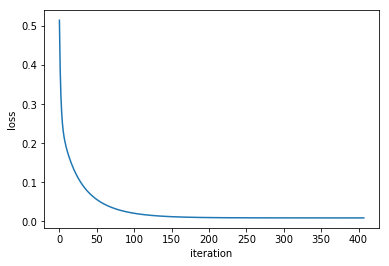

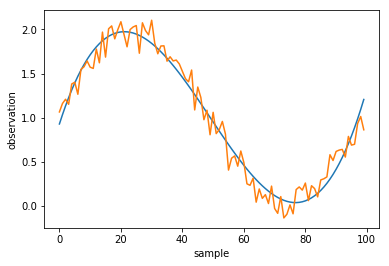

In [22]:
from implementations import least_squares_GD

# input parameters 
initial_w = np.zeros(tx.shape[1])
max_iters = 10000
gamma = 1e-1

# least squares GD
w_tot, loss_tot = least_squares_GD(y, tx, initial_w, max_iters, gamma)

# plot results
plt.figure()
plt.plot(loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(tx.dot(w_tot[-1]))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test Least Squares Stochastic Gradient Descent

Stochastic Gradient Descent(4091/9999): loss MSE=0.00848419025919676


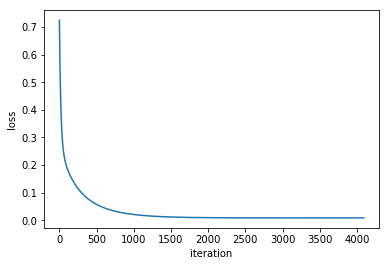

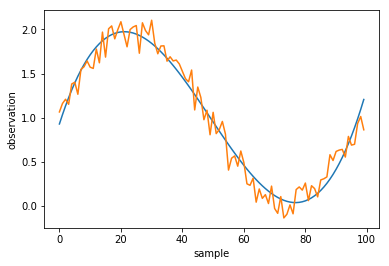

In [24]:
from implementations import least_squares_SGD

# input parameters 
initial_w = np.zeros(tx.shape[1])
max_iters = 10000
gamma = 1e-2
batch_size = 100

# least squares GD
w_tot, loss_tot = least_squares_SGD(y, tx, initial_w, max_iters, gamma, batch_size)

# plot results
plt.figure()
plt.plot(loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(tx.dot(w_tot[-1]))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test logistic regression (GD)

Logistic Regression (100000/100000): loss logLikelihood=7.87184222329445


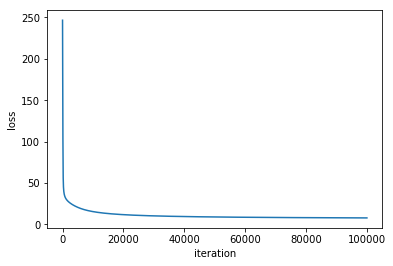

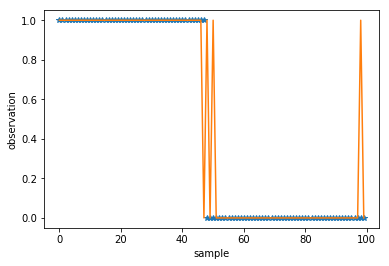

In [27]:
from implementations import logistic_regression
from proj1_helpers import predict_labels

# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# input parameters 
initial_w = np.ones(tx.shape[1])
max_iters = 100000
gamma = 1e-4
method = 'gd'

# logistic regression
w_tot, loss_tot = logistic_regression(ylabels, tx, initial_w, max_iters, gamma, method)

# predict labels
ypred = predict_labels(w_tot[-1], tx)

# plot results
plt.figure()
plt.plot(loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(ypred, '*')
plt.plot(ylabels)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test logistic regression (Newton)

Logistic Regression (98/10000): loss logLikelihood=6.658504218145655


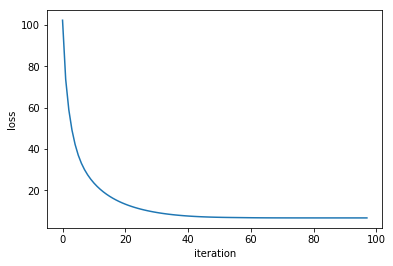

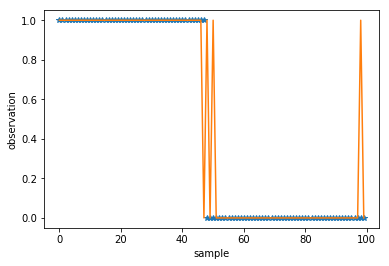

In [28]:
from implementations import logistic_regression
from proj1_helpers import predict_labels

# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# input parameters 
initial_w = np.ones(tx.shape[1])
max_iters = 10000
gamma = 1e-1
method = 'newton'

# logistic regression
w_tot, loss_tot = logistic_regression(ylabels, tx, initial_w, max_iters, gamma, method)

# predict labels
ypred = predict_labels(w_tot[-1], tx)

# plot results
plt.figure()
plt.plot(loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(ypred, '*')
plt.plot(ylabels)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test the regularized logistic regression (GD)

Logistic Regression Regularized (29464/100000): loss loglikelihood=28.69841883387093


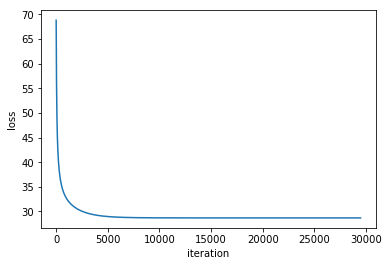

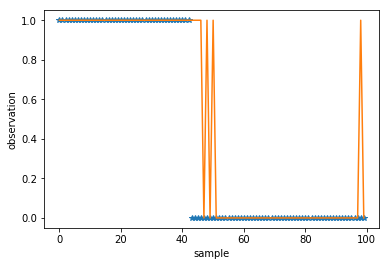

In [29]:
from implementations import reg_logistic_regression
from proj1_helpers import predict_labels

# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# input parameters 
initial_w = np.zeros(tx.shape[1])
max_iters = 100000
gamma = 1e-4
lambda_ = 1
method = 'gd'

# logistic regression
w_tot, loss_tot = reg_logistic_regression(ylabels, tx, initial_w, max_iters, gamma, method, lambda_)

# predict labels
ypred = predict_labels(w_tot[-1], tx)

# plot results
plt.figure()
plt.plot(loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(ypred, '*')
plt.plot(ylabels)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test the regularized logistic regression (Newton)

Logistic Regression Regularized (108/10000): loss loglikelihood=9.069837699028898


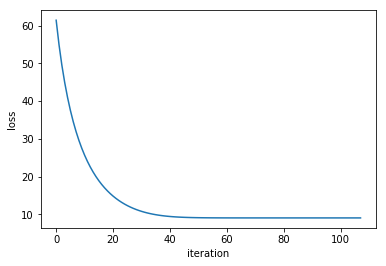

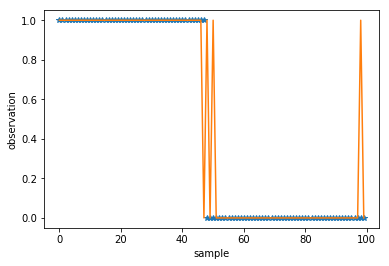

In [30]:
from implementations import reg_logistic_regression
from proj1_helpers import predict_labels

# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# input parameters 
initial_w = np.zeros(tx.shape[1])
max_iters = 10000
gamma = 1e-1
lambda_ = 0.01
method = 'newton'

# logistic regression
w_tot, loss_tot = reg_logistic_regression(ylabels, tx, initial_w, max_iters, gamma, method, lambda_)

# predict labels
ypred = predict_labels(w_tot[-1], tx)

# plot results
plt.figure()
plt.plot(loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(ypred, '*')
plt.plot(ylabels)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()